# Readability Analysis of Job Postings

This notebook analyzes how readable different types of job posts are:
- Real job postings  
- Human-written fake posts  
- AI-refined fake posts  

Understanding readability helps:
- Build trust with clearer language  
- Detect scams using vague/simple text  
- Analyze AI output for unnatural or overly smooth writing

### Readability Metrics Used

- **Flesch Reading Ease**  
  Higher = easier to read  
- **Flesch-Kincaid Grade Level**  
  Grade level needed to understand the text


In [19]:
import pandas as pd
import textstat
import seaborn as sns
import matplotlib.pyplot as plt


# Load datasets
real_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/real_jobs.csv", keep_default_na=False
)
human_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/fake_jobs.csv", keep_default_na=False
)
ai_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/llm_refined_fake_posts2.csv",
    keep_default_na=False,
)

# Label each dataset
real_jobs["label"] = "real"
human_fake_jobs["label"] = "human_fake"
ai_fake_jobs["label"] = "ai_fake"
print(data["label"].value_counts())

# Combine all into one dataframe
data = pd.concat([real_jobs, human_fake_jobs, ai_fake_jobs], ignore_index=True)

label
real          17014
human_fake      866
ai_fake         866
Name: count, dtype: int64



## Apply Readability Metrics

We'll now use the `textstat` library to calculate:

- Flesch Reading Ease
- Flesch-Kincaid Grade Level


In [9]:
# Safe scoring functions
def safe_flesch(text):
    try:
        return textstat.flesch_reading_ease(text)
    except Exception:
        return None


def safe_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except Exception:
        return None


# Apply readability scores
data["desc_flesch"] = data["description"].apply(safe_flesch)
data["desc_grade"] = data["description"].apply(safe_grade)
data["req_flesch"] = data["requirements"].apply(safe_flesch)
data["req_grade"] = data["requirements"].apply(safe_grade)

# Differences
data["flesch_diff"] = data["desc_flesch"] - data["req_flesch"]
data["grade_diff"] = data["desc_grade"] - data["req_grade"]
data_clean = data.dropna(
    subset=["desc_flesch", "req_flesch", "desc_grade", "req_grade"]
)


## Visualizing the Results

We'll compute average readability scores by job post type.

In [10]:
# Compute average readability scores by label
avg_readability = data_clean.groupby("label").agg({
    "desc_flesch": "mean",
    "req_flesch": "mean",
    "desc_grade": "mean",
    "req_grade": "mean",
    "flesch_diff": "mean",
    "grade_diff": "mean"
}).reset_index().round(2)

# Print it
print(avg_readability)


print(avg_readability)


        label  desc_flesch  req_flesch  desc_grade  req_grade  flesch_diff  \
0     ai_fake        32.79       -0.29       10.78       3.23        33.08   
1  human_fake        32.79       -0.29       10.78       3.23        33.08   
2        real        43.82       12.45       10.99       6.58        31.38   

   grade_diff  
0        7.55  
1        7.55  
2        4.42  
        label  desc_flesch  req_flesch  desc_grade  req_grade  flesch_diff  \
0     ai_fake        32.79       -0.29       10.78       3.23        33.08   
1  human_fake        32.79       -0.29       10.78       3.23        33.08   
2        real        43.82       12.45       10.99       6.58        31.38   

   grade_diff  
0        7.55  
1        7.55  
2        4.42  


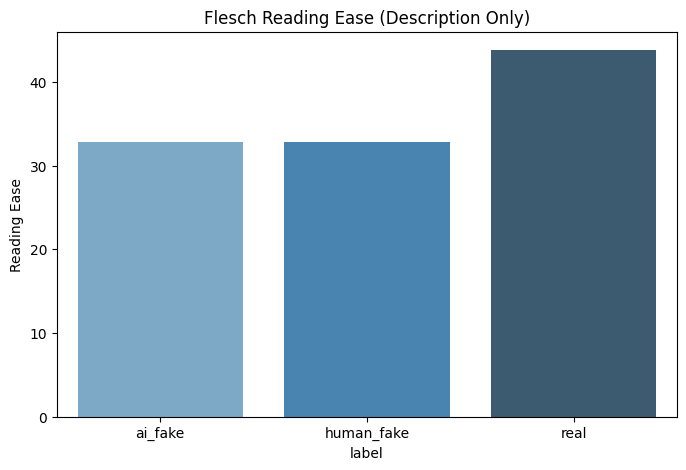

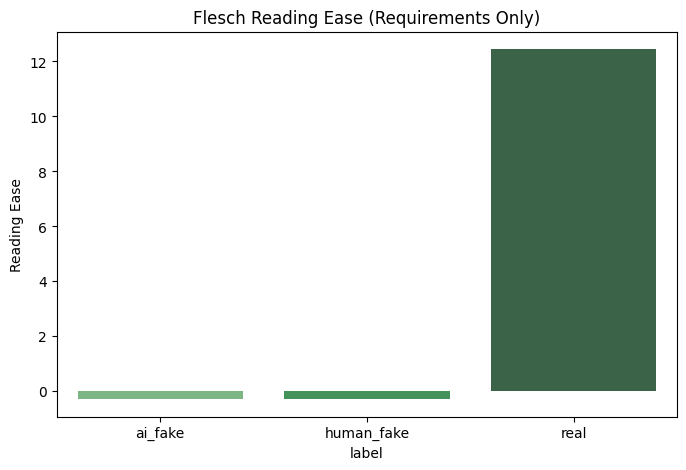

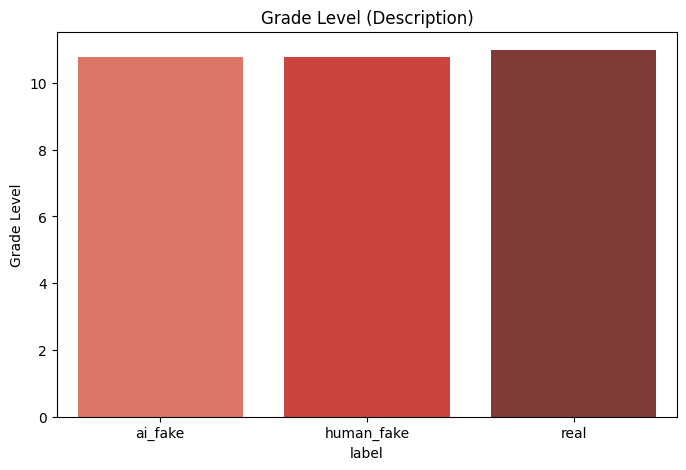

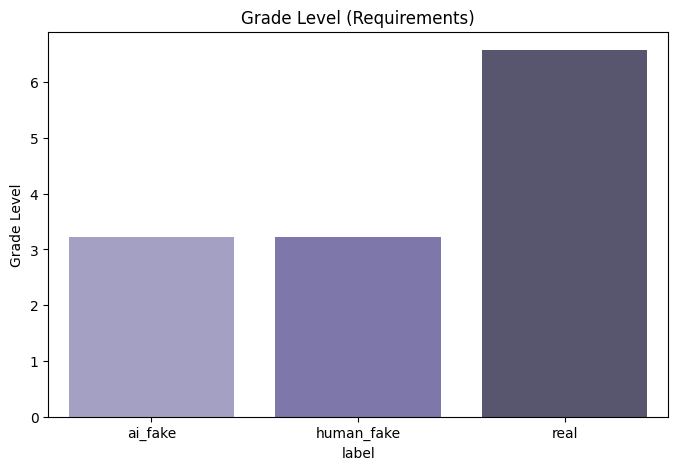

In [12]:
# Plotting the results

# Description Flesch
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability, x="label",
    y="desc_flesch", hue="label", 
    palette="Blues_d", legend=False)
plt.title("Flesch Reading Ease (Description Only)")
plt.ylabel("Reading Ease")
plt.show()

# Requirements Flesch
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability, x="label",
    y="req_flesch", hue="label", 
    palette="Greens_d", legend=False)
plt.title("Flesch Reading Ease (Requirements Only)")
plt.ylabel("Reading Ease")
plt.show()

# Description Grade
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability, x="label",
    y="desc_grade", hue="label", 
    palette="Reds_d", legend=False)
plt.title("Grade Level (Description)")
plt.ylabel("Grade Level")
plt.show()

# Requirements Grade
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_readability, x="label",
    y="req_grade", hue="label", 
    palette="Purples_d", legend=False)
plt.title("Grade Level (Requirements)")
plt.ylabel("Grade Level")
plt.show()


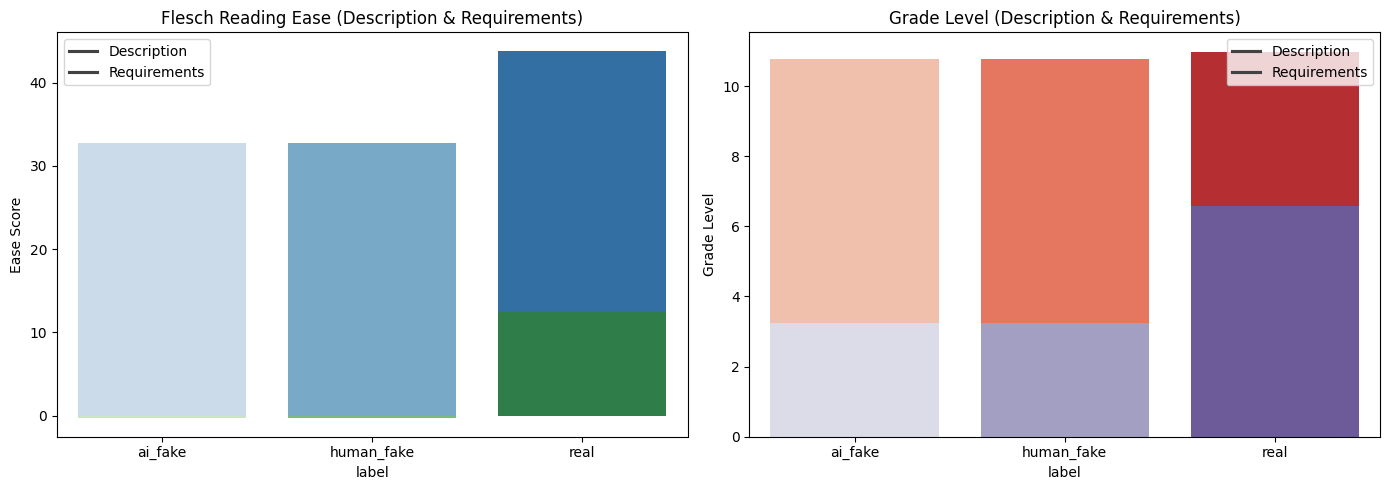

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Flesch Reading Ease
sns.barplot(
    data=avg_readability,
    x="label",
    y="desc_flesch",
    hue="label",
    palette="Blues",
    ax=axes[0],
)
sns.barplot(
    data=avg_readability,
    x="label",
    y="req_flesch",
    hue="label",
    palette="Greens",
    ax=axes[0],
)
axes[0].set_title("Flesch Reading Ease (Description & Requirements)")
axes[0].set_ylabel("Ease Score")
axes[0].legend(["Description", "Requirements"])

# Grade Level
sns.barplot(
    data=avg_readability,
    x="label",
    y="desc_grade",
    hue="label",
    palette="Reds",
    ax=axes[1],
)
sns.barplot(
    data=avg_readability,
    x="label",
    y="req_grade",
    hue="label",
    palette="Purples",
    ax=axes[1],
)
axes[1].set_title("Grade Level (Description & Requirements)")
axes[1].set_ylabel("Grade Level")
axes[1].legend(["Description", "Requirements"])

plt.tight_layout()
plt.show()


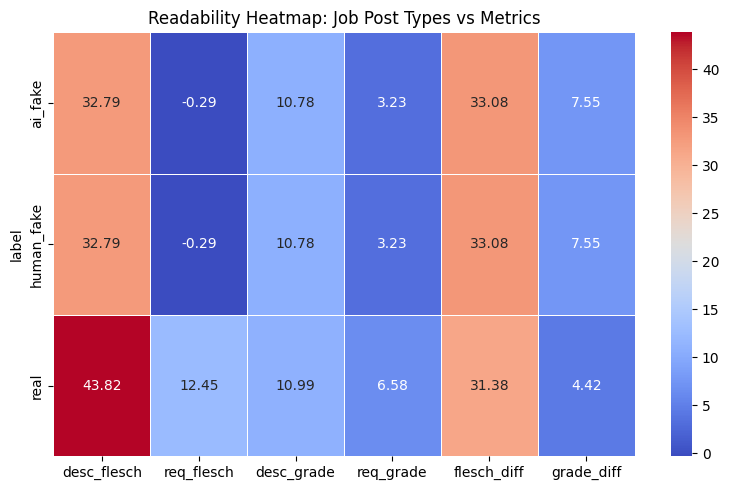

In [18]:
import seaborn as sns

# Prepare heatmap data
heatmap_data = avg_readability.set_index("label")
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True,
            cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Readability Heatmap: Job Post Types vs Metrics")
plt.tight_layout()
plt.show()


### AI Fake Job Posts

| **Metric**    | **Value** | **What It Means**                                  |
| ------------- | --------- | -------------------------------------------------- |
| `desc_flesch` | 32.79     | Kinda hard to read                                 |
| `req_flesch`  | -0.29     | Very hard to read (unusual)                        |
| `desc_grade`  | 10.78     | High school-level writing                          |
| `req_grade`   | 3.23      | Super simple or broken writing                     |
| `flesch_diff` | 33.08     | Big gap in tone between description & requirements |
| `grade_diff`  | 7.55      | Description = high, Requirements = super low       |


### Human Fake Jobs
| **Metric**    | **Value** | **What It Means**                                  |
| ------------- | --------- | -------------------------------------------------- |
| `desc_flesch` | 32.79     | Kinda hard to read                                 |
| `req_flesch`  | -0.29     | Very hard to read (unusual)                        |
| `desc_grade`  | 10.78     | High school-level writing                          |
| `req_grade`   | 3.23      | Super simple or broken writing                     |
| `flesch_diff` | 33.08     | Big gap in tone between description & requirements |
| `grade_diff`  | 7.55      | Description = high, Requirements = super low       |


### Real Job Posts
| **Metric**    | **Value** | **What It Means**                                   |
| ------------- | --------- | --------------------------------------------------- |
| `desc_flesch` | 43.82     | Easier to read — more natural & clear               |
| `req_flesch`  | 12.45     | Still hard to read — likely dense or technical      |
| `desc_grade`  | 10.99     | High school or early college-level writing          |
| `req_grade`   | 6.58      | Around 6th–7th grade level                          |
| `flesch_diff` | 31.38     | Clear tone shift between description & requirements |
| `grade_diff`  | 4.42      | Moderate education level difference                 |


### Observations on Readability Metrics

#### 1. Descriptions Are Harder to Read Than Requirements in Fake Posts
- `desc_flesch` for both `ai_fake` and `human_fake` is **~32.79**, which is considered **hard to read**.
- `req_flesch` is **-0.29**, an extremely low score that suggests:
  - Fragmented or broken sentence structure
  - Possibly just lists or bullet points without full sentences

#### 2. Fake Posts Show Unnatural Tone Shifts
- There's a **large difference** between description and requirements readability:
  - `flesch_diff = 33.08`
  - `grade_diff = 7.55`
- This means fake job posts have a **polished, complex description**, followed by **simple or incomplete requirements**.
- Such imbalance could indicate **AI-generated or templated content**.

#### 3. Real Job Posts Are More Balanced and Professional
- Real job posts show:
  - `desc_flesch = 43.82` → easier to read than fake posts
  - `req_flesch = 12.45` → still readable but simpler
- Grade levels are also more aligned:
  - `desc_grade = 10.99`, `req_grade = 6.58`
- The **smaller differences** suggest a **consistent tone and structure**, typical of professional writing.

---

### Key Takeaway

> Readability metrics help **spot inconsistencies** between sections of a job post.  
> A large gap — like a complex intro followed by broken or vague requirements — could be a **signal of a scam or AI-generated job posting**.
